# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [296]:
# load data from database
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Raw_data_clean.db')
df = pd.read_sql("SELECT * FROM RawData", engine)

In [101]:
df.head(3)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
categories = df.drop(columns = ['id', 'message', 'original', 'genre'])

Let's first see if there's anything wrong with those numerical values.

In [103]:
categories.describe()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.0,...,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000
mean,0.773568,0.170512,0.004507,0.414095,0.079488,0.050076,0.027655,0.017991,0.032811,0.0,...,0.011803,0.043965,0.278304,0.082086,0.093201,0.010772,0.093659,0.020168,0.052559,0.193430
std,0.435351,0.376089,0.066986,0.492574,0.270504,0.218107,0.163985,0.132920,0.178146,0.0,...,0.108000,0.205021,0.448172,0.274500,0.290719,0.103228,0.291360,0.140578,0.223156,0.394995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can spot something is wrong with the 'related' label as the max value 2 appears. 

In [104]:
df[df['related'] > 1].head(3)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
117,146,Dans la zone de Saint Etienne la route de Jacm...,Nan zon st. etine rout jakmel la bloke se mize...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,263,. .. i with limited means. Certain patients co...,t avec des moyens limites. Certains patients v...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304,373,The internet caf Net@le that's by the Dal road...,Cyber cafe net@le ki chita rout de dal tou pr ...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we now correct those anomalous data as follows

In [105]:
# total entries with wrong labels
(categories['related'] > 1).sum()

188

The sum of other labels of each anomalous row:

In [106]:
a_rows = categories[categories['related'] > 1].drop(columns = 'related')
a_rows.sum(axis=1), a_rows.sum(axis=1).max(), a_rows.sum(axis=1).min()

(117      0
 218      0
 304      0
 459      0
 575      0
         ..
 20294    0
 20465    0
 22293    0
 23349    0
 25179    0
 Length: 188, dtype: int64,
 0,
 0)

We see that for those rows, all other labels are 0. Hence we conclude that the original label 'related-2' actually means 'related-0'. Then we can correct them:

In [298]:
df.loc[df['related'] > 1,'related'] = 0 # set labels 2 to 0
categories = df.drop(columns = ['id', 'message', 'original', 'genre'])

We now check the distribution of the length of messages.

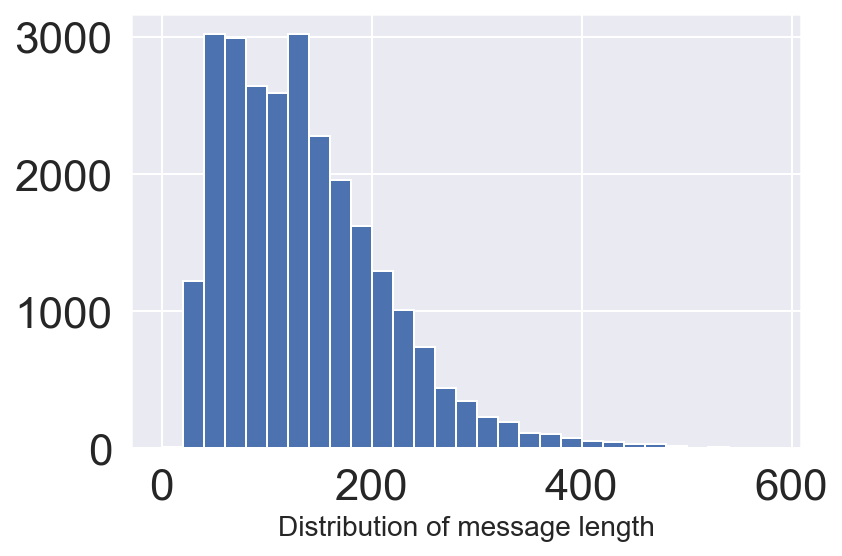

In [109]:
lens = df.message.str.len()
lens.hist(bins = np.arange(0,600,20))
plt.xlabel('Distribution of message length', fontsize = 14)
plt.show()

In [110]:
# 20 longest lengths 
lens.sort_values().values[-20:]

array([ 3963,  4011,  4102,  4151,  4153,  4227,  4236,  4746,  4769,
        5052,  5149,  5451,  5783,  6144,  6313,  6510,  6936,  6951,
       10571, 10818])

In [111]:
df[df['id'].isin(lens.sort_values().index.values[:2])]

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
10594,12185,I can bring as much as I can carry in a few tr...,None,direct,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
19214,22465,"consists of an airstrip, an Indonesian army ou...",None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [299]:
# delete two longest outliers
df = df[~df['id'].isin(lens.sort_values().index.values[-2:])]
categories = df.drop(columns = ['id', 'message', 'original', 'genre'])

Now let's do some visualizations for the data. Code adapted from this [post](https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff).

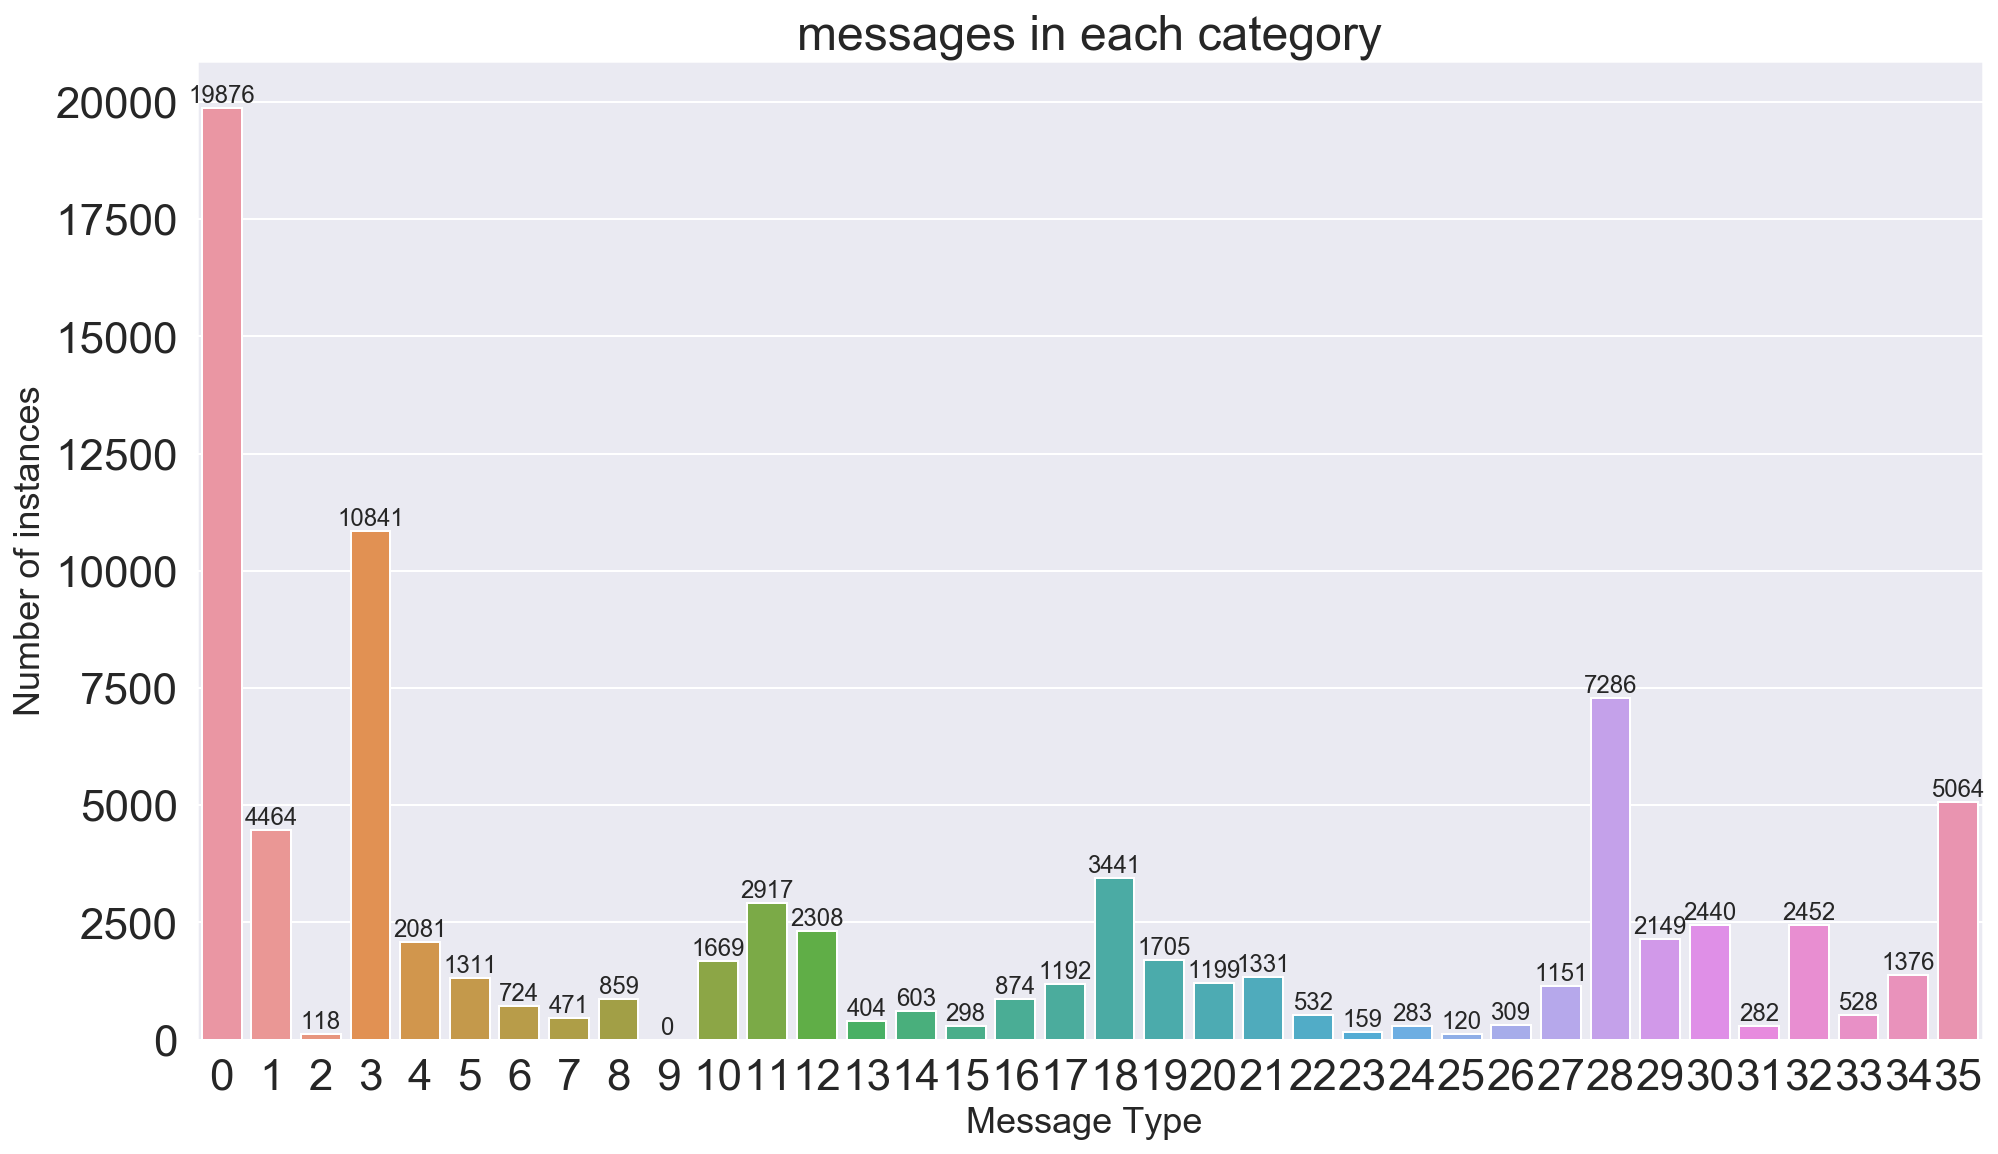

In [116]:
# cats = list(categories.columns.values)
cats = list(range(categories.shape[1])) # replace the name of categories into numbers
counts = categories.sum().values
sns.set(font_scale = 2)
plt.figure(figsize=(16,9))
ax= sns.barplot(cats, counts)
plt.title("messages in each category", fontsize=24)
plt.ylabel('Number of instances', fontsize=18)
plt.xlabel('Message Type ', fontsize=18)
#adding the text labels
rects = ax.patches
for rect, count in zip(rects, counts):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, count, ha='center', va='bottom', fontsize=12)
plt.show()

We can see that several message types are very rare, i.e., the data set is imbalanced. There is even a category coming without any positive labels at all! (#9, 'child_alone'), which means none of the messages belongs to this category.
Let's pull the names of all imbalanced set:

In [117]:
criteria = (counts/categories.shape[0]) < 0.03 #less than 3% of data are positive lables
categories.columns.values[criteria]

array(['offer', 'search_and_rescue', 'security', 'child_alone',
       'clothing', 'money', 'missing_people', 'electricity', 'tools',
       'hospitals', 'shops', 'aid_centers', 'fire', 'cold'], dtype=object)

In [300]:
# delete the empty column
df = df.drop(columns = 'child_alone')
categories = df.drop(columns = ['id', 'message', 'original', 'genre'])

Next we inspect the distribution of multilabels, i.e., how many labels do one message get?

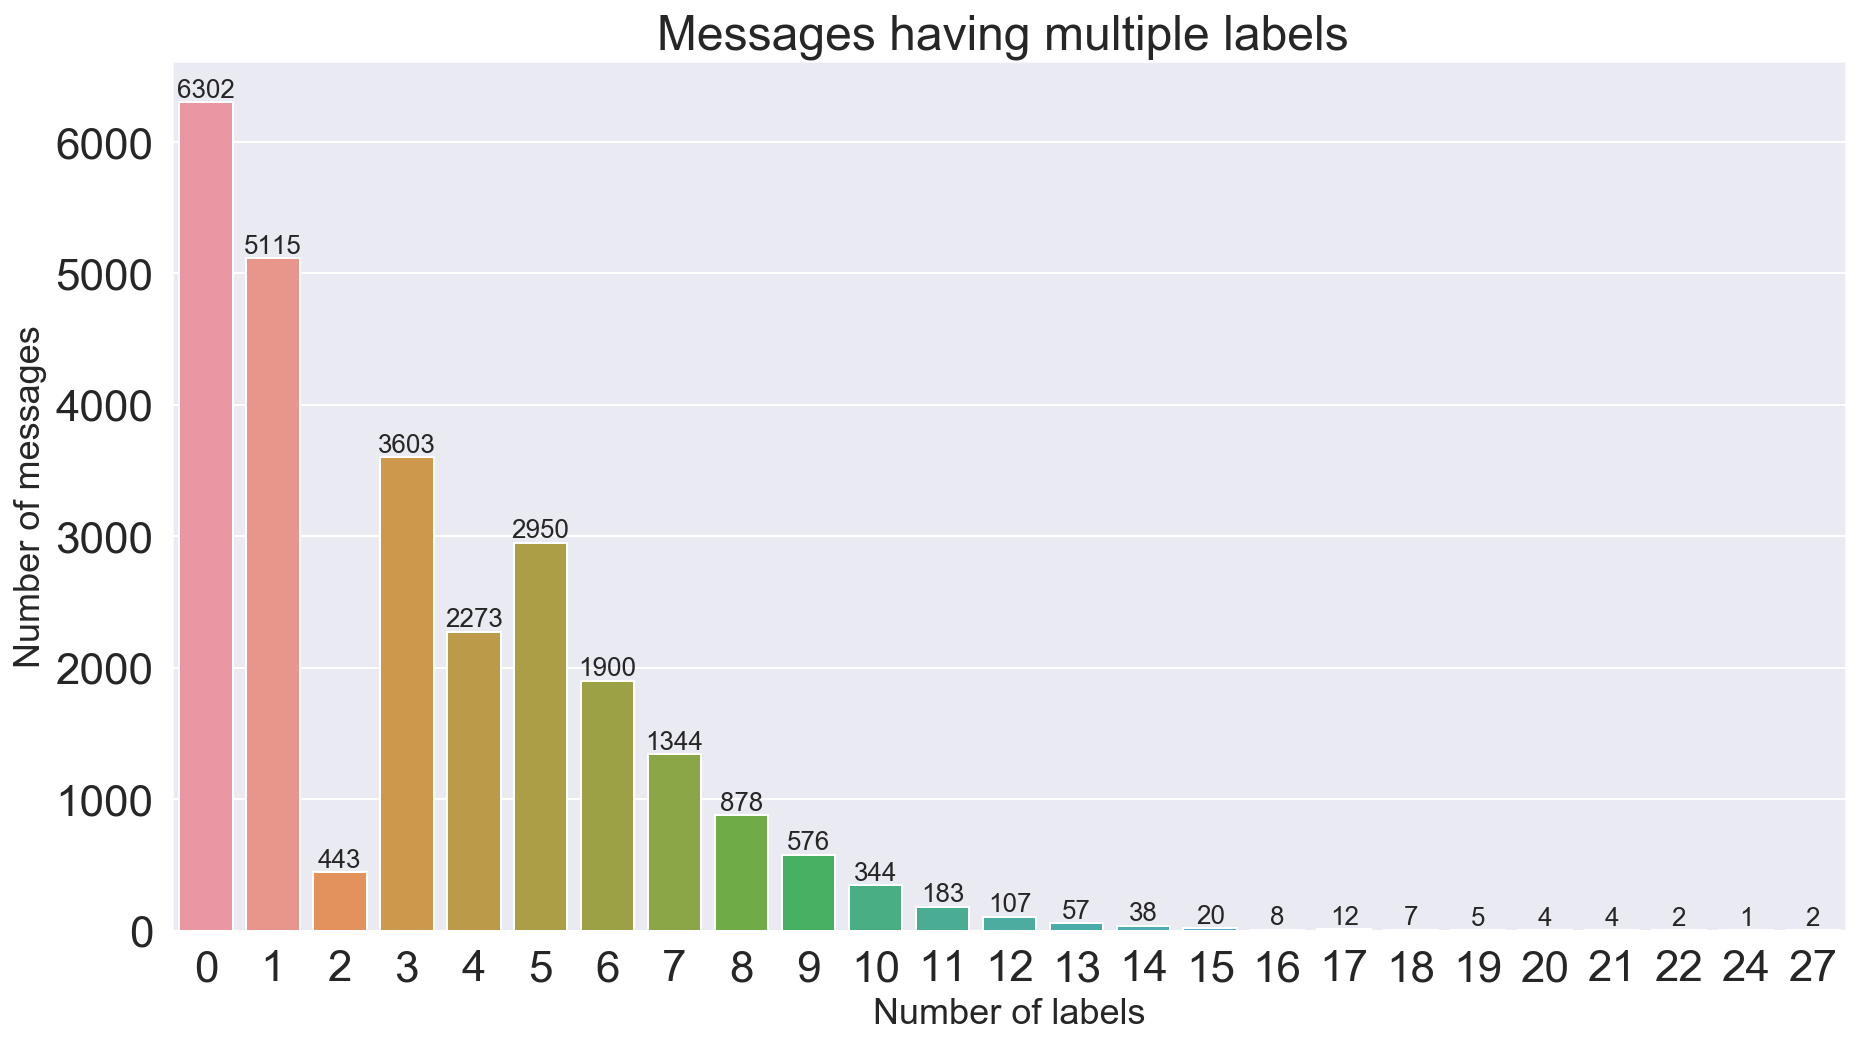

In [148]:
rowsums = categories.sum(axis=1)
multiLabel_counts = rowsums.value_counts().sort_index()
# multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Messages having multiple labels ")
plt.ylabel('Number of messages', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=13)
plt.show()

Except for an outlier 2, the rest of the data clearly shows the trend that multi-labeled messages are uncommon. And over 23% of the messages even don't have any positive labels. 

For those with messages with one label, we can check that the only label they get is 'related' = 1.

In [170]:
# the sum of all other labels for those with total label # 1
related_check_1 = categories.loc[(rowSums == 1).values].drop(columns = 'related').sum(axis=1)
related_check_1.sum()

0

So based on the number of labels that these messages get, we find that a message is first classified as 'related' or not. If related, then it is further classified into some subcategories. But a large number of related messages do not fall into any of these subcategories. 

For those messages which do get further classified, they are likely to get multiple tags because the 35 sub-fields are not mutually exclusive. Hence it explains why the number of messages with two labels are so rare. We can check that one of the labels these messages get is 'related' = 1 

In [175]:
# numbers of messages with 2 labels
label_num_2 = (rowsums == 2).sum() 
# numbers of 'related' = 1 for those 2-labeled messages 
label_num_2_related_1 = df.loc[rowsums[rowsums == 2].index].related.sum()
# each of the message has 'related' = 1
label_num_2 == label_num_2_related_1

True

Morover, if we only look at the rows where the label 'related' =0, we'll see all the rest of labels are also zero. As the name suggests, it means that only when the message is classified as 'related', then it is further classified into sub categories.

After these inspection and visualization, we now proceed to the modeling part.

In [ ]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

### 2. Write a tokenization function to process your text data

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [16]:
import re

stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize andremove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [383]:
base_lr = LogisticRegression()
pipe = Pipeline([
    ('tfidf_vect', TfidfVectorizer(tokenizer = tokenize)),
    ('clf', OneVsRestClassifier(base_lr)),
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [372]:
from sklearn.model_selection import train_test_split
categories = df.drop(columns = ['id', 'message', 'original', 'genre'])
x, y = df['message'].to_numpy(), categories.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle = True, random_state=0)
#y_train, y_test = np.ma.make_mask(y_train, shrink=False), np.ma.make_mask(y_test, shrink=False)  

In [358]:
x_train.shape, y_train.shape, y.shape, x.shape

((18324, 4), (18324, 35), (26178, 35), (26178, 4))

In [373]:
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
ovr_jaccard_score = jaccard_score(y_test, y_pred, average='samples')

/Users/empyriumz/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [374]:
ovr_jaccard_score

0.43167595730072844

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [375]:
from sklearn import metrics
target_names = categories.columns.values
report = metrics.classification_report(y_test, y_pred, target_names = target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

/Users/empyriumz/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/empyriumz/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/empyriumz/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [376]:
report_df[(report_df['precision'] == 0.0) | (report_df.index == 'macro avg')]

,precision,recall,f1-score,support
offer,0.000000,0.000000,0.000000,41.0
security,0.000000,0.000000,0.000000,128.0
tools,0.000000,0.000000,0.000000,36.0
hospitals,0.000000,0.000000,0.000000,105.0
shops,0.000000,0.000000,0.000000,37.0
aid_centers,0.000000,0.000000,0.000000,105.0
macro avg,0.624784,0.228008,0.292929,24596.0


We see from those anomalous predicted results with precision = recall = 0 all come from the categories where the positive samples are scarce. If the classifier simply labels every sample to be negative the resulting accuracy will be very high as well.

### 6. Improve your model
Use grid search to find better parameters. 

In [384]:
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()

## parameters for logistic_regression
parameters = {
    'tfidf_vect__max_df': (0.5, 0.75, 1.0),
    'tfidf_vect__max_features': (None, 5000, 10000),
    'tfidf_vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf_vect__norm': ('l1', 'l2'), 
    'clf__estimator__alpha': (0.00001, 0.0001, 0.001),
    'clf__estimator__penalty': ('l1', 'l2', 'elasticnet'),
    'clf__estimator__max_iter': (50, 100, 500), 
    'clc__estimator__C': (0.1, 1.0, 10, 100),
    'clc__estimator__class_weight':('balanced', None)
}

# for random forest 
# parameters = {
# #     'tfidf_vect__max_df': (0.5, 0.75, 1.0),
# #     #'tfidf_vect__max_features': (None, 5000, 10000),
# #     'tfidf_vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
# # #     'tfidf_vect__use_idf': (True, False),
# #     'tfidf_vect__norm': ('l1', 'l2'), 
#     'clf__estimator__n_estimators': (50, 100, 500),
#     'clf__estimator__class_weight': (None, 'balanced', 'balanced_subsample'),   
# }


grid_search = GridSearchCV(pipe, parameters, n_jobs=-1, verbose=1)

In [385]:
from pprint import pprint
from time import time

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipe.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'clf']
parameters:
{'clc__estimator__C': (0.1, 1.0, 10, 100),
 'clc__estimator__class_weight': ('balanced', None),
 'clf__estimator__alpha': (1e-05, 0.0001, 0.001),
 'clf__estimator__max_iter': (50, 100, 500),
 'clf__estimator__penalty': ('l1', 'l2', 'elasticnet'),
 'tfidf_vect__max_df': (0.5, 0.75, 1.0),
 'tfidf_vect__max_features': (None, 5000, 10000),
 'tfidf_vect__ngram_range': ((1, 1), (1, 2)),
 'tfidf_vect__norm': ('l1', 'l2')}
Fitting 5 folds for each of 7776 candidates, totalling 38880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [314]:
rmtree(cachedir)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
best_parameters['clf']

In [ ]:
new_pipe = Pipeline([
    ('tfidf_vect', best_parameters['tfidf_vect']),
    ('clf', best_parameters['clf']),
])

In [ ]:
new_pipe.fit(x_train, y_train)
y_pred = new_pipe.predict(x_test)
ovr_jaccard_score = jaccard_score(y_test, y_pred, average='samples')

In [ ]:
ovr_jaccard_score

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [82]:
df['genre'].value_counts()

news      13039
direct    10747
social     2394
Name: genre, dtype: int64

In [83]:
len(df[(df['genre'] == 'social') & (df['related'] == 1)])/df['related'].sum()

0.10318977661501308

In [84]:
len(df[(df['genre'] == 'direct') & (df['related'] == 1)])/df['related'].sum()

0.360635942845643

In [85]:
len(df[(df['genre'] == 'news') & (df['related'] == 1)])/df['related'].sum()

0.5361742805393439

In [378]:
x, y = df[['message', 'genre']], categories.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle = True, random_state=0)

column_trans = ColumnTransformer(
    [('genre_categroy', OneHotEncoder(dtype='int'),['genre']),
     ('message_tfidf', TfidfVectorizer(tokenizer = tokenize), 'message')])

In [379]:
pipe = Pipeline([
    ('pre_proc', column_trans),
    ('clf', OneVsRestClassifier(base_lr)),
])

In [380]:
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
ovr_jaccard_score = jaccard_score(y_test, y_pred, average='samples')

/Users/empyriumz/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/empyriumz/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

In [381]:
ovr_jaccard_score

0.42958316149550685

In [369]:
target_names = categories.columns.values
report = metrics.classification_report(y_test, y_pred, target_names = target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

/Users/empyriumz/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/empyriumz/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/empyriumz/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [370]:
report_df[(report_df['precision'] == 0.0) | (report_df.index == 'macro avg')]

,precision,recall,f1-score,support
offer,0.000000,0.000000,0.000,41.0
security,0.000000,0.000000,0.000,128.0
infrastructure_related,0.000000,0.000000,0.000,538.0
tools,0.000000,0.000000,0.000,36.0
hospitals,0.000000,0.000000,0.000,105.0
shops,0.000000,0.000000,0.000,37.0
aid_centers,0.000000,0.000000,0.000,105.0
other_infrastructure,0.000000,0.000000,0.000,340.0
macro avg,0.569426,0.278633,0.338,24596.0


### 9. Export your model as a pickle file

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.